PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# 데이터셋 준비
iris = load_iris()
x = iris.data   # 특성 ( 4차원 )
y = iris.target # 클래스 ( 0, 1, 2 ) 


In [ ]:
print(x.shape)
print(iris)

In [8]:
# 표준화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
# PCA 객체 생성
#n_components = 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [12]:
# pca 결과
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


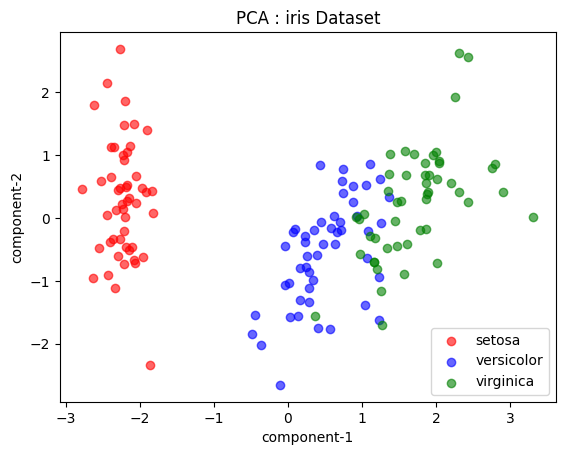

In [14]:
plt.Figure(figsize=(8, 6))
# (class, color, iris.target_names)

for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'], iris.target_names):
    plt.scatter(x_pca[y == target, 0], 
                x_pca[y == target, 1],
                color = color, label=label, alpha=0.6
                )
    
plt.title('PCA : iris Dataset')
plt.xlabel('component-1')
plt.ylabel('component-2')
plt.legend()
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [23]:
# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784', version=1) # 28x28 => 784개
x, y = mnist.data, mnist.target

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
# t-sne 객체 생성
tsne = TSNE(n_components=2, random_state=42, max_iter=1000, perplexity=30)
x_tsne = tsne.fit_transform(x_scaled[:2000])

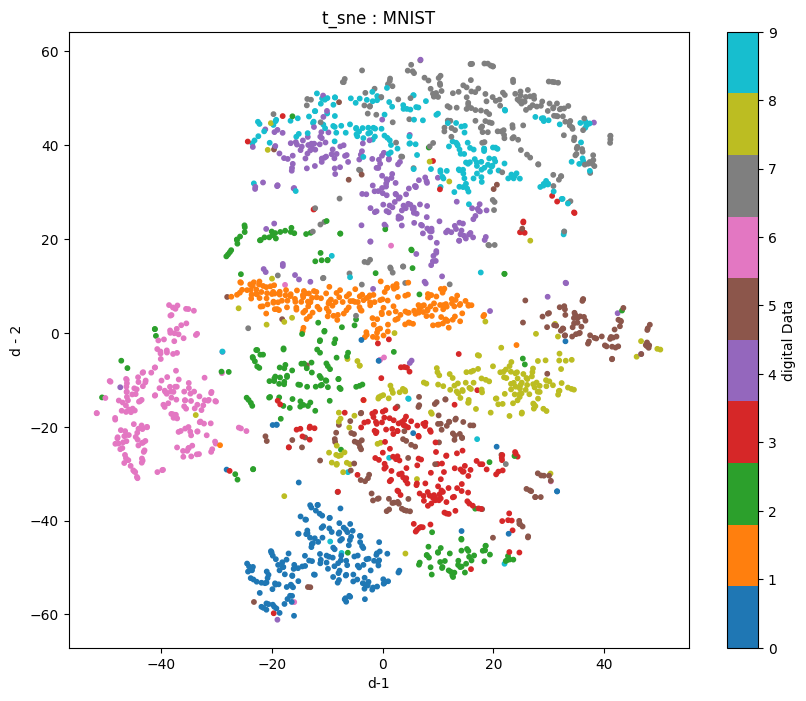

In [46]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y[:2000].astype(int), cmap='tab10', s=10)
plt.colorbar(scatter, label='digital Data')
plt.title('t_sne : MNIST')
plt.xlabel('d-1')
plt.ylabel('d - 2')
plt.show()

In [2]:
# Isolation Forest : 이상치 탐지
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
# 데이터 생성
np.random.seed(42)

In [3]:
# 정상범위 데이터 생성 : (100개, 2차원)
normal_traffic = np.random.normal(loc=50, scale=10, size=(100,2))
print(type(normal_traffic))

<class 'numpy.ndarray'>


In [4]:
# 이상범위 데이터 생성 : 100 ~ 150 , 10개 2차원
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10, 2))

In [5]:
# 데이터 결합 => DataFrame
traffic_data = np.vstack((normal_traffic, anomalous_traffic))
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count", "Response Time"])

In [42]:
# 객체 생성 -> 학습 -> 결과
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

In [43]:
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)

In [47]:
# 이상 탐지 결과를 해석하여 "Normal" 또는 "Anomaly"로 표시
traffic_df['Anomaly'] = traffic_df['Anomaly Score'].apply(lambda x: 
"Normal" if x == 1 else "Anomaly")

In [48]:
# 3. 비정상 데이터의 범위 확인 -이상 데이터만 필터링
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]

In [49]:
min_req_count = anomalous_data['Request Count'].min()
max_req_count = anomalous_data['Request Count'].max()
min_res_time = anomalous_data['Response Time'].min()
max_res_time = anomalous_data['Response Time'].max()

In [50]:
print('min_req_count : ', min_req_count)
print('max_req_count : ', max_req_count)
print('min_res_time : ', min_res_time)
print('max_res_time : ', max_res_time)

min_req_count :  23.802548959102555
max_req_count :  145.66202762782356
min_res_time :  58.21902504375224
max_res_time :  144.5002670908783


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


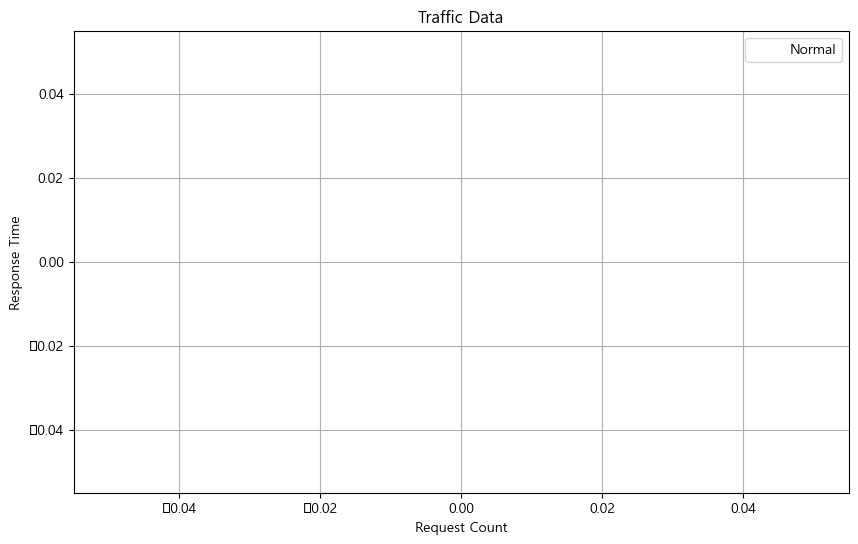

In [55]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    traffic_df['Request Count'], traffic_df['Response Time'],
    c=traffic_df['Anomaly Score'].map({'Normal' : 'blue', 'Anomaly' : 'red'}),
    label='Traffic'
)
plt.title('Traffic Data')
plt.xlabel('Request Count')
plt.ylabel('Response Time')
plt.legend(['Normal', 'Anomaly'])
plt.grid()
plt.show()

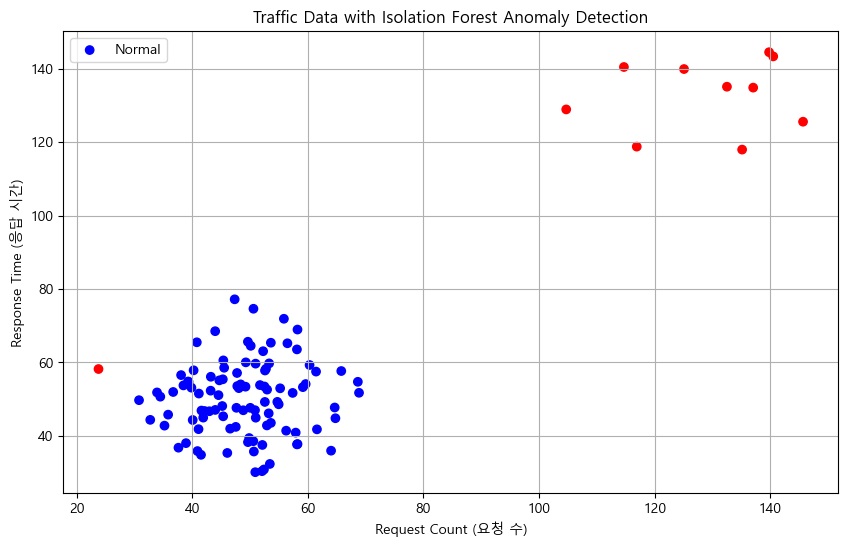

In [54]:
# 4. 시각화
# 정상과 비정상을 다른 색으로 표시하여 트래픽 데이터 시각화
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
plt.scatter(
traffic_df["Request Count"], traffic_df["Response Time"],
 c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly": 
"red"}), # 색상 매핑
  label='Traffic'
 )
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()

In [56]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [58]:
# 1. 데이터 생성
# 난수 시드 고정
np.random.seed(42)
 # 정상 트래픽 데이터 생성 (평균: 50, 표준편차: 10)
normal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))
 # 비정상 트래픽 데이터 생성 (비정상적으로 높은 값)
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10, 2))
 # 데이터 결합
traffic_data = np.vstack((normal_traffic, anomalous_traffic))
 # 데이터프레임으로 변환
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count", 
"Response Time"])
print(traffic_df)

     Request Count  Response Time
0        54.967142      48.617357
1        56.476885      65.230299
2        47.658466      47.658630
3        65.792128      57.674347
4        45.305256      55.425600
..             ...            ...
105     125.567120     125.075815
106     139.914759     132.498197
107     135.098344     139.789633
108     144.500267     116.899758
109     118.779148     104.699097

[110 rows x 2 columns]


In [59]:
# DBSCAN 객체 생성 => 훈련 => 결과 => DataFrame 열 추가
dbscan = DBSCAN(eps=15, min_samples=5)

In [60]:
traffic_df['Cluster'] = dbscan.fit_predict(traffic_df)

In [62]:
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

In [63]:
traffic_df

,Request Count,Response Time,Cluster,Anomaly
0,54.967142,48.617357,0,Normal
1,56.476885,65.230299,0,Normal
2,47.658466,47.658630,0,Normal
3,65.792128,57.674347,0,Normal
4,45.305256,55.425600,0,Normal
...,...,...,...,...
105,125.567120,125.075815,1,Normal
106,139.914759,132.498197,1,Normal
107,135.098344,139.789633,1,Normal
108,144.500267,116.899758,-1,Anomaly


In [65]:
# 이상치 범위 확인
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]
min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()

In [67]:
print('min_req_count : ', min_request_count)
print('max_req_count : ', max_request_count)
print('min_res_time : ', min_response_time)
print('max_res_time : ', max_response_time)

min_req_count :  117.97455756098776
max_req_count :  144.5002670908783
min_res_time :  104.69909699204345
max_res_time :  116.89975784257679


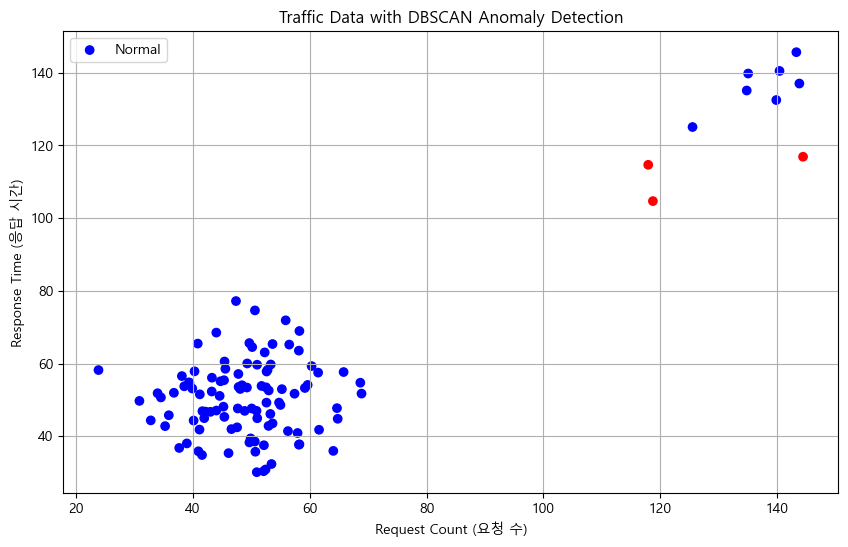

In [70]:
# 4. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.figure(figsize=(10, 6))
plt.scatter(
 traffic_df["Request Count"], traffic_df["Response Time"],
 c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly": 
"red"}), # 색상 매핑
  label="Traffic"
 )
plt.title("Traffic Data with DBSCAN Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()